In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/Traffic_Data_3.csv')

In [3]:
df.head()

Date Road/Intersection Name  Traffic Volume  Average Speed  \
0  01-01-2022      Kalina Kurla Road        0.394691       0.000000   
1         NaN              CST Road         0.232048       0.138486   
2         NaN     Road no. 01, TPS V        0.333274       0.289923   
3  01-01-2022   Vakola Pipeline Road        0.622414       0.134711   
4  01-01-2022        St Anthony Road        0.602303       0.369206   

   Travel Time Index  Congestion Level  Road Capacity Utilization  \
0           0.939567          0.506610                        NaN   
1           0.366939          0.520000                   0.217400   
2           0.185031          0.312639                   0.650560   
3           0.596512               NaN                   0.951606   
4                NaN          0.309344                   0.637379   

   Incident Reports  Environmental Impact  Public Transport Usage  \
0               0.8              0.160889                0.854954   
1               0.2              0.300819                0.970027   
2               0.0              0.424564                0.867435   
3               0.8              0.303636                0.253161   
4               0.4              0.205700                0.734581   

   Traffic Signal Compliance  Parking Usage  Pedestrian and Cyclist Count  \
0                   0.874981       0.821369                      0.772152   
1                   0.494275            NaN                      0.518987   
2                   0.409401       0.339658                      0.727848   
3                   0.621091       0.228394                      0.202532   
4                   0.048124       0.047132                      0.848101   

  Weather Conditions  Roadwork and Construction Activity  
0               Mild                                 1.0  
1               Mild                                 NaN  
2               Mild                                 0.0  
3               Mild                                 1.0  
4               Mild                                 1.0

In [4]:
print(df.describe())

       Traffic Volume  Average Speed  Travel Time Index  Congestion Level  \
count    95692.000000   95711.000000       95800.000000      95885.000000   
mean         0.520503       0.117172           0.482156          0.549600   
std          0.197373       0.192931           0.212842          0.265852   
min          0.000000       0.000000           0.000000          0.000000   
25%          0.364143       0.000000           0.326199          0.330000   
50%          0.521689       0.000000           0.482964          0.550605   
75%          0.677393       0.186203           0.639184          0.780000   
max          1.000000       1.000000           1.000000          1.000000   

       Road Capacity Utilization  Incident Reports  Environmental Impact  \
count               95747.000000      96015.000000          95747.000000   
mean                    0.498588          0.424842              0.288873   
std                     0.288797          0.290710              0.149243   
mi

In [5]:
df.shape

(105850, 15)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105850 entries, 0 to 105849
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                95708 non-null  object 
 1   Road/Intersection Name              95755 non-null  object 
 2   Traffic Volume                      95692 non-null  float64
 3   Average Speed                       95711 non-null  float64
 4   Travel Time Index                   95800 non-null  float64
 5   Congestion Level                    95885 non-null  float64
 6   Road Capacity Utilization           95747 non-null  float64
 7   Incident Reports                    96015 non-null  float64
 8   Environmental Impact                95747 non-null  float64
 9   Public Transport Usage              95806 non-null  float64
 10  Traffic Signal Compliance           95668 non-null  float64
 11  Parking Usage                       957

In [7]:
df.isnull().sum()

Date                                  10142
Road/Intersection Name                10095
Traffic Volume                        10158
Average Speed                         10139
Travel Time Index                     10050
Congestion Level                       9965
Road Capacity Utilization             10103
Incident Reports                       9835
Environmental Impact                  10103
Public Transport Usage                10044
Traffic Signal Compliance             10182
Parking Usage                         10073
Pedestrian and Cyclist Count           9974
Weather Conditions                    10128
Roadwork and Construction Activity    10130
dtype: int64

## Data Cleaning

In [8]:
df['Traffic Volume'] = df['Traffic Volume'].interpolate(method='linear')

In [9]:
df['Weather Conditions'].fillna(df['Weather Conditions'].mode()[0], inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\1055074250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather Conditions'].fillna(df['Weather Conditions'].mode()[0], inplace=True)


In [10]:
df['Average Speed'].fillna(df['Average Speed'].mean(), inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\2525100194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Speed'].fillna(df['Average Speed'].mean(), inplace=True)


In [11]:
df.isnull().sum()

Date                                  10142
Road/Intersection Name                10095
Traffic Volume                            0
Average Speed                             0
Travel Time Index                     10050
Congestion Level                       9965
Road Capacity Utilization             10103
Incident Reports                       9835
Environmental Impact                  10103
Public Transport Usage                10044
Traffic Signal Compliance             10182
Parking Usage                         10073
Pedestrian and Cyclist Count           9974
Weather Conditions                        0
Roadwork and Construction Activity    10130
dtype: int64

In [12]:
df['Date'].fillna(method='ffill', inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\3572410786.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(method='ffill', inplace=True)
C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\3572410786.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='ffill', inplace=True)


In [13]:
df['Road/Intersection Name'].fillna(method='ffill', inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\782937216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Road/Intersection Name'].fillna(method='ffill', inplace=True)
C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\782937216.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Road/Intersection Name'].fillna(method='ffill', inplace=True)


In [14]:
df['Travel Time Index'] = df['Travel Time Index'].interpolate(method='linear')

In [15]:
df['Congestion Level'] = df['Congestion Level'].interpolate(method='linear')

In [16]:
df['Road Capacity Utilization'] = df['Road Capacity Utilization'].interpolate(method='linear')

In [17]:
df['Incident Reports'].fillna(df['Incident Reports'].mode()[0], inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\3827230808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Incident Reports'].fillna(df['Incident Reports'].mode()[0], inplace=True)


In [18]:
df['Environmental Impact'] = df['Environmental Impact'].interpolate(method='linear')

In [19]:
df['Public Transport Usage'] = df['Public Transport Usage'].fillna(df['Public Transport Usage'].rolling(7, min_periods=1).mean())

In [20]:
df['Traffic Signal Compliance'].fillna(df['Traffic Signal Compliance'].mode()[0], inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\456181192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic Signal Compliance'].fillna(df['Traffic Signal Compliance'].mode()[0], inplace=True)


In [21]:
df['Parking Usage'] = df['Parking Usage'].interpolate(method='linear')

In [22]:
df['Pedestrian and Cyclist Count'] = df['Pedestrian and Cyclist Count'].interpolate(method='linear')

In [23]:
df['Roadwork and Construction Activity'].fillna(df['Roadwork and Construction Activity'].mode()[0], inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_14504\3203251860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Roadwork and Construction Activity'].fillna(df['Roadwork and Construction Activity'].mode()[0], inplace=True)


In [24]:
df.isnull().sum()

Date                                  0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             1
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

## DATA Exploring 

In [25]:
print(df['Weather Conditions'].unique())

['Mild' 'Fog' 'Clear' 'Heatwave' 'Hot and Humid' 'Rainy' 'Thunderstorm']


In [26]:
print(df['Road/Intersection Name'].nunique())
print(df['Road/Intersection Name'].unique()) 

283
['Kalina Kurla Road' 'CST Road ' 'Road no. 01, TPS V'
 'Vakola Pipeline Road' 'St Anthony Road' 'Mahalaxmi Mandir Road'
 'Rajendra Kamble Road' 'New English School Marg' 'Samaj Mandir Hall Marg'
 'J L Shirshekar Marg' 'Road no. 07, TPS III' 'Road No. 06, TPS III'
 'Road No. 04, TPS III' 'Road no. 11, TPS V' 'Ram Mandir Road'
 'Military Camp Road' 'Side strips of Jawaharlal Nehru Road'
 'Vijay Nagar Road' 'Chhatrapati Shivaji Maharaj Road Extn.'
 'Parshiwadi Road' 'Manipada Road' 'Shardadevi Marg'
 'Road no. 08, TPS III' 'Takshila Marg' 'Dnyaneshwar Mandir Marg'
 'Abbasaheb Shinde Marg' 'Sunder Nagar Road no. 01'
 'Sunder Nagar Road no. 03' 'Ramanath Parkar Marg' 'Khernagar Road no. 01'
 'Khernagar Road no. 03' 'Khernagar Road no. 04' 'Khernagar Road no. 06'
 'Khernagar Road no. 07' 'Khernagar Road no. 08' 'V.M. Bhargav Road'
 'Sidestrip of Juhu Road' 'SS of Kanubhai Desai Marg'
 '11th Road, Khar West ' '14th B Road, Khar(W)' 'Gurugangeshwar Road'
 '10th Road' 'Main Avenue Road' 'R 

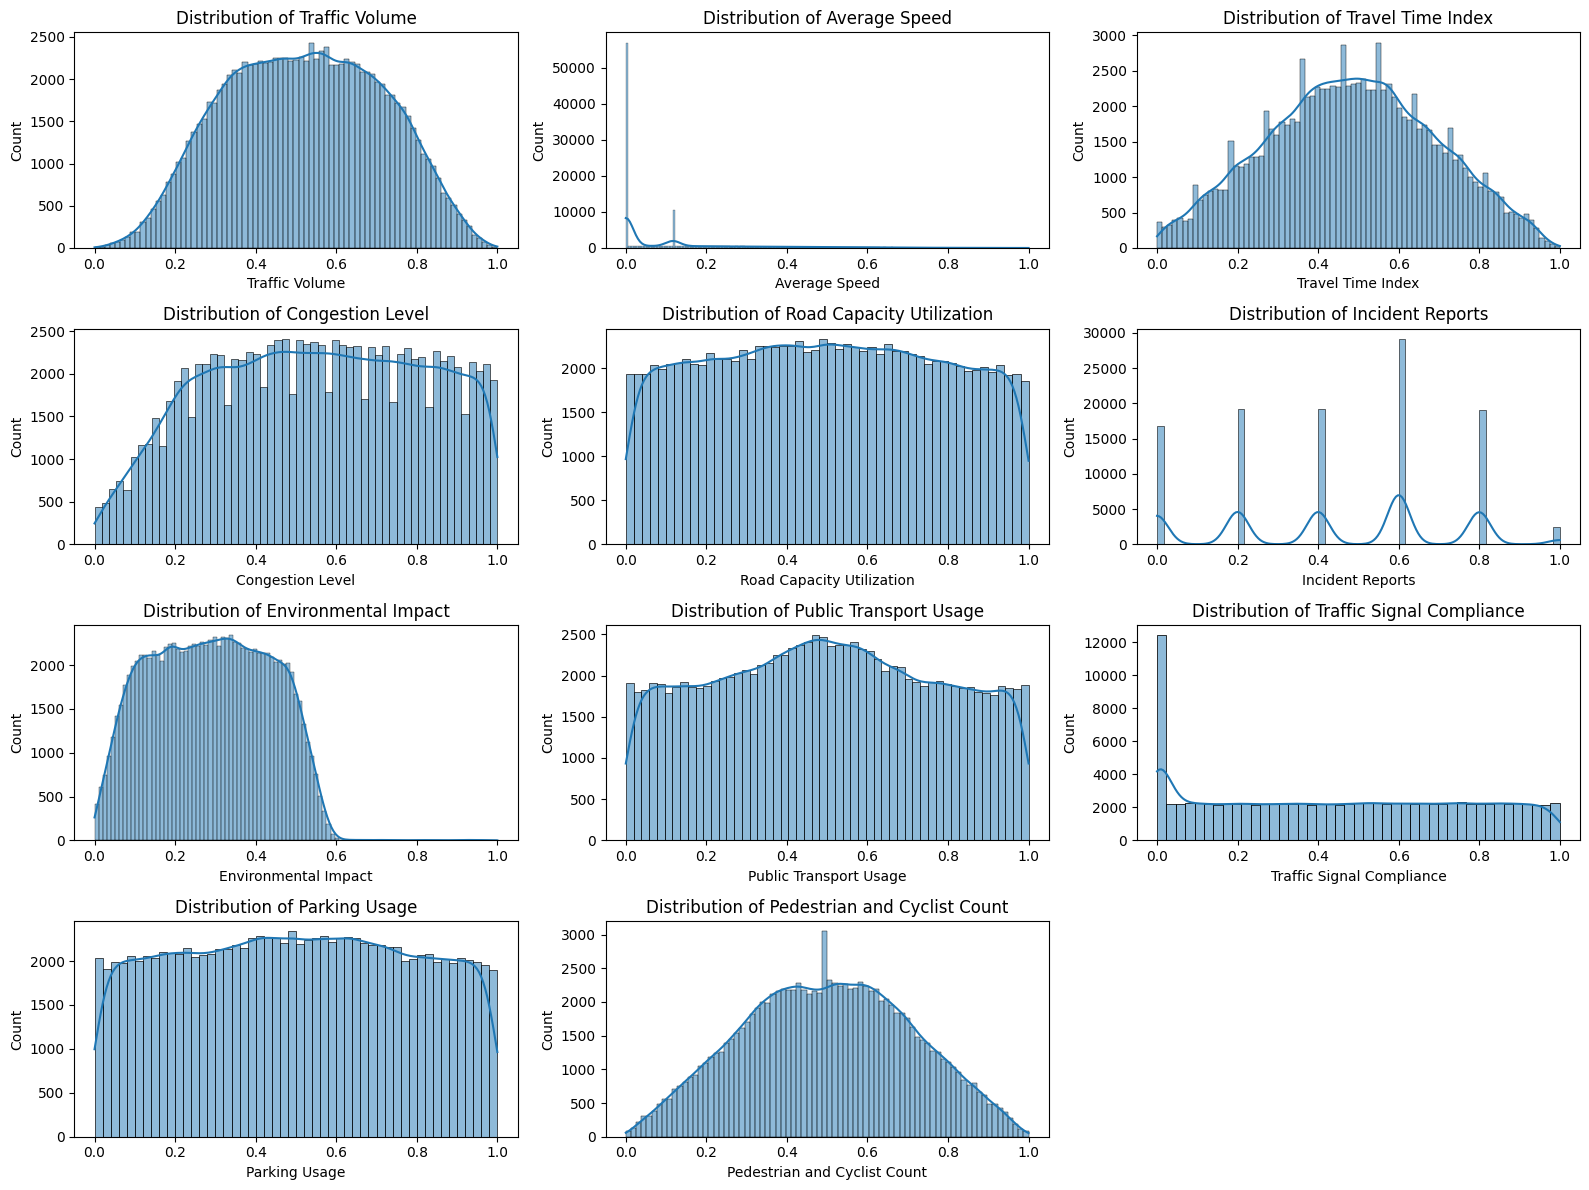

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution for each numerical feature
numerical_columns = ["Traffic Volume", "Average Speed", "Travel Time Index", "Congestion Level",
                     "Road Capacity Utilization", "Incident Reports", "Environmental Impact", 
                     "Public Transport Usage", "Traffic Signal Compliance", "Parking Usage", 
                     "Pedestrian and Cyclist Count"]

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

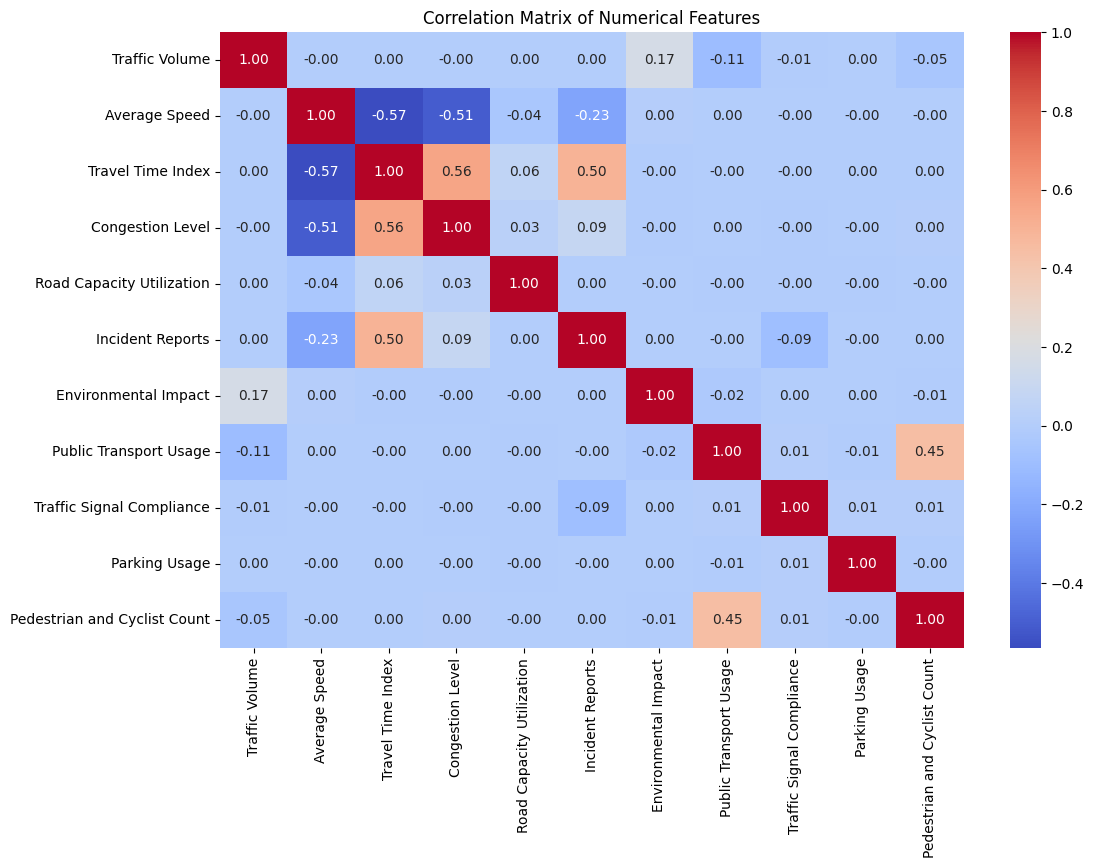

In [28]:
# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


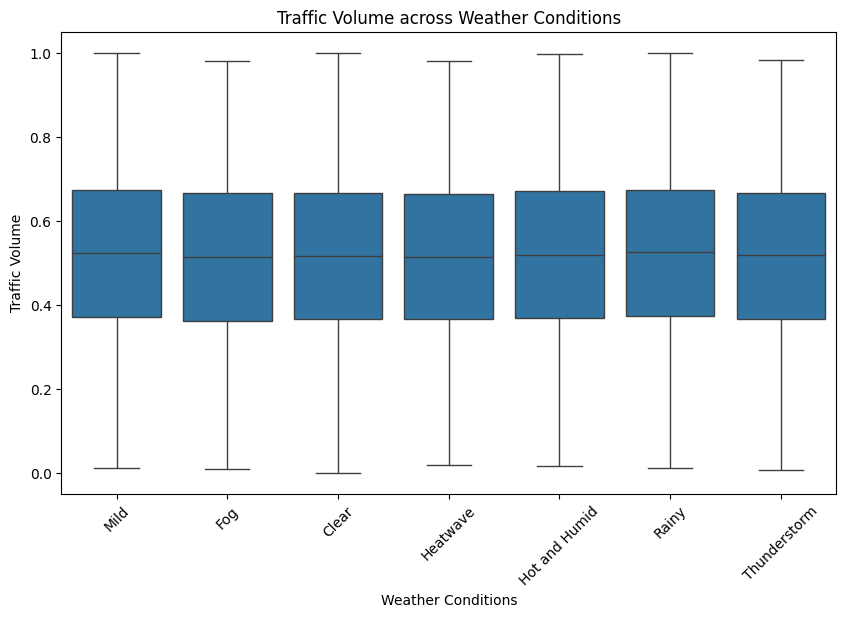

C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


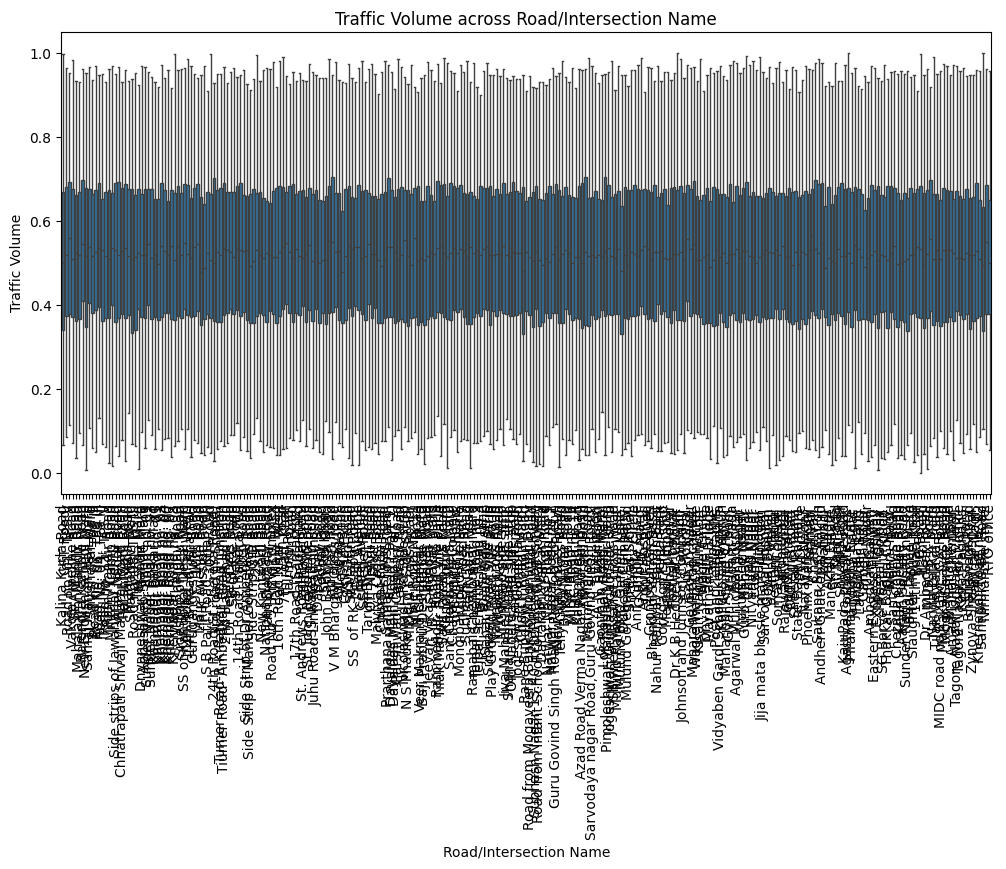

In [29]:
# Boxplot of 'Traffic Volume' across different 'Weather Conditions'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Conditions', y='Traffic Volume', data=df)
plt.title('Traffic Volume across Weather Conditions')
plt.xticks(rotation=45)
plt.show()

# Similar plot for 'Road/Intersection Name'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Road/Intersection Name', y='Traffic Volume', data=df)
plt.title('Traffic Volume across Road/Intersection Name')
plt.xticks(rotation=90)
plt.show()

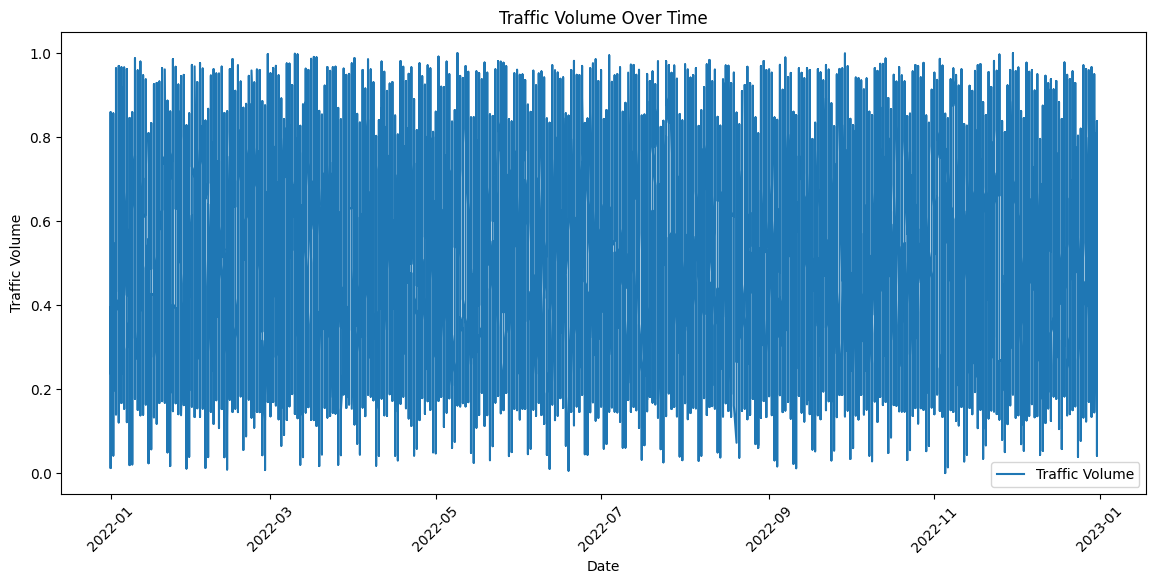

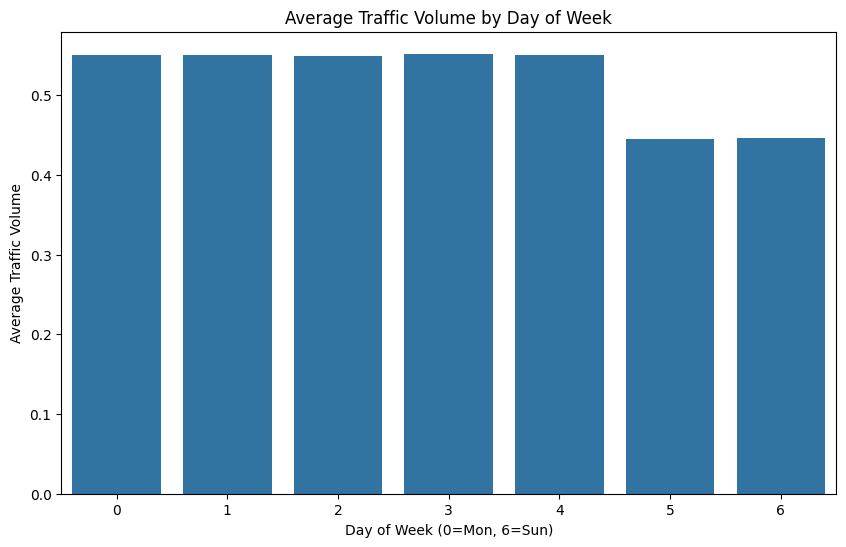

In [30]:
# Plot Traffic Volume over time
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Traffic Volume'], label='Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Average Traffic Volume by Day of Week
df['Day of Week'] = df['Date'].dt.dayofweek  
avg_traffic_by_day = df.groupby('Day of Week')['Traffic Volume'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_traffic_by_day.index, y=avg_traffic_by_day.values)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Traffic Volume')
plt.show()

C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


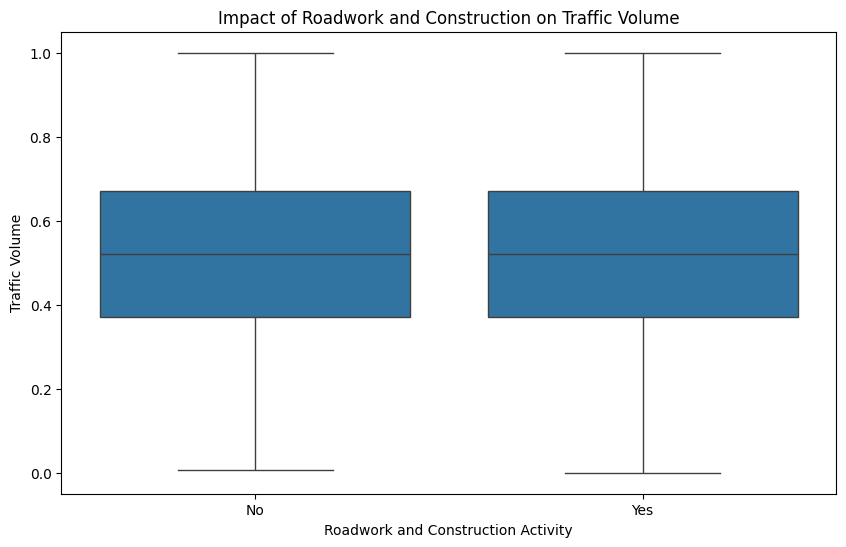

In [31]:
# Compare Traffic Volume based on roadwork and construction activity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Roadwork and Construction Activity', y='Traffic Volume', data=df)
plt.title('Impact of Roadwork and Construction on Traffic Volume')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

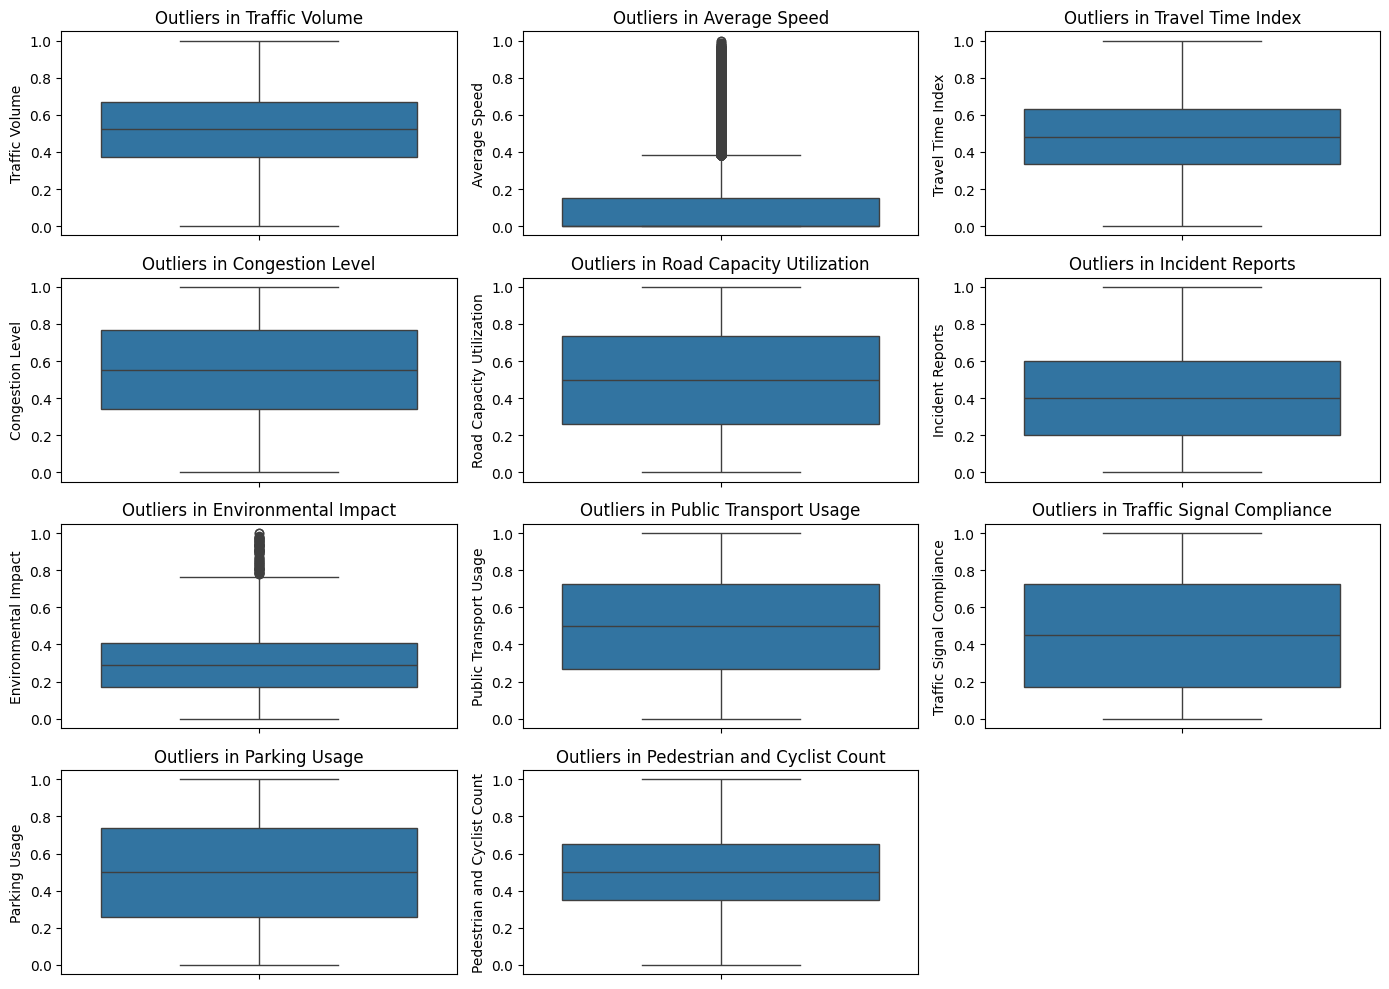

In [32]:
# Use boxplot to visualize outliers in numerical features
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

### Outliers (by inter quartile range [IQR] method) 

#### Average Speed

C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Average Speed'>

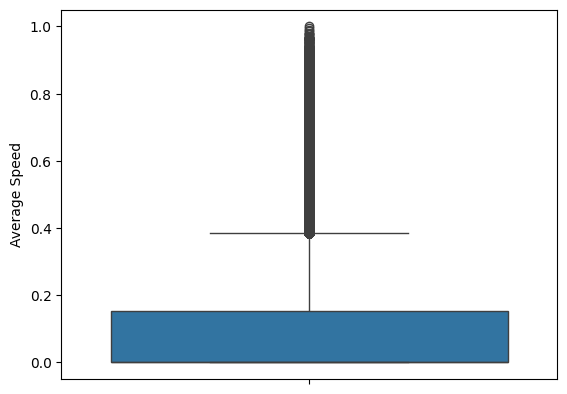

In [34]:
sns.boxplot(df['Average Speed'])

In [35]:
q1 = df['Average Speed'].quantile(0.25)
q3 = df['Average Speed'].quantile(0.75)

In [36]:
iqr = q3-q1

In [37]:
q1,q3,iqr

(0.0, 0.1535442615983954, 0.1535442615983954)

In [40]:
upper_limit=  q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-0.2303163923975931, 0.3838606539959885)

In [42]:
df.loc[(df['Average Speed'] > upper_limit) | (df['Average Speed'] < lower_limit)]

Date      Road/Intersection Name  Traffic Volume  Average Speed  \
19     2022-01-01          Military Camp Road        0.437295       0.431359   
49     2022-01-01            Main Avenue Road        0.343914       0.556955   
51     2022-01-01   S B Patil Road , Khar (W)        0.637475       0.496531   
53     2022-01-01  24th Road(St Theresa Road)        0.283346       0.467617   
66     2022-01-01         Side Strip C D Road        0.305899       0.459962   
...           ...                         ...             ...            ...   
105773 2022-12-31          Nirmal Life style         0.741631       0.573457   
105789 2022-12-31     Maharishi Arvind Chowk         0.563225       0.431621   
105799 2022-12-31                  Pantnagar         0.801233       0.403433   
105801 2022-12-31                  RTO office        0.300731       0.563344   
105805 2022-12-31                 Amar Mahal         0.751994       0.649372   

        Travel Time Index  Congestion Level  Road Capacity Utilization  \
19               0.361020          0.210000                   0.417166   
49               0.047347          0.080000                   0.079124   
51               0.423332          0.050000                   0.462688   
53               0.301837          0.510000                   0.163598   
66               0.485306          0.319938                   0.116601   
...                   ...               ...                        ...   
105773           0.295918          0.300000                   0.100906   
105789           0.236735          0.200000                   0.173946   
105799           0.328050          0.554292                   0.777171   
105801           0.189388          0.120000                   0.691485   
105805           0.312645          0.752884                   0.633053   

        Incident Reports  Environmental Impact  Public Transport Usage  \
19                   0.8              0.098979                0.477539   
49                   0.0              0.463883                0.713212   
51                   0.0              0.224542                0.726700   
53                   0.0              0.244685                0.358496   
66                   0.8              0.183618                0.935035   
...                  ...                   ...                     ...   
105773               0.4              0.549387                0.196117   
105789               0.4              0.461423                0.935661   
105799               0.0              0.224946                0.283925   
105801               0.6              0.142283                0.481113   
105805               0.6              0.155449                0.872976   

        Traffic Signal Compliance  Parking Usage  \
19                       0.644768       0.079247   
49                       0.837169       0.813266   
51                       0.000000       0.584955   
53                       0.607226       0.427952   
66                       0.433689       0.764627   
...                           ...            ...   
105773                   0.381504       0.292257   
105789                   0.857249       0.607432   
105799                   0.421141       0.408619   
105801                   0.118031       0.638964   
105805                   0.521840       0.101189   

        Pedestrian and Cyclist Count Weather Conditions  \
19                          0.272152               Mild   
49                          0.626582               Mild   
51                          0.803797               Mild   
53                          0.449367               Mild   
66                          0.924051               Mild   
...                              ...                ...   
105773                      0.284810                Fog   
105789                      0.379747                Fog   
105799                      0.449367               Mild   
105801                      0.601266                Fog   


In [44]:
new_df = df.loc[(df['Average Speed'] < upper_limit) & (df['Average Speed'] > lower_limit)]
print('before removing outliers: ' , len(df))
print('after removing outliers: ', len(new_df))
print('outliers:' ,len(df) - len(new_df))

before removing outliers:  105850
after removing outliers:  94201
outliers: 11649


C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Average Speed'>

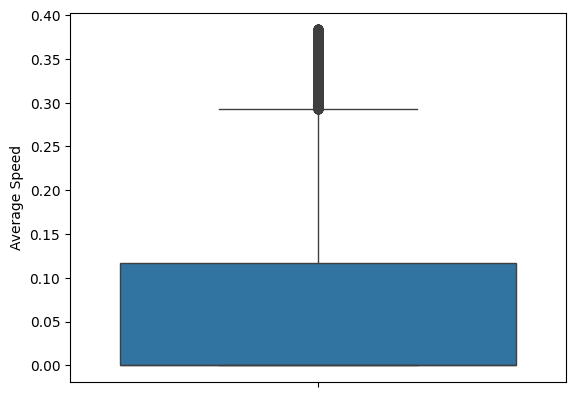

In [45]:
sns.boxplot(new_df['Average Speed'])

In [47]:
# capping - change the outlier values to upper (or) lower limit
new_df = df.copy()
new_df.loc[(new_df['Average Speed']>upper_limit), 'Average Speed'] = upper_limit
new_df.loc[(new_df['Average Speed']<lower_limit), 'Average Speed'] = lower_limit

C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Average Speed'>

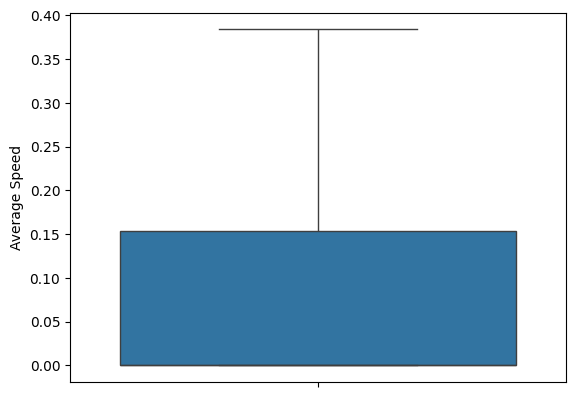

In [48]:
sns.boxplot(new_df['Average Speed'])

#### Environmental Impact

C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Environmental Impact'>

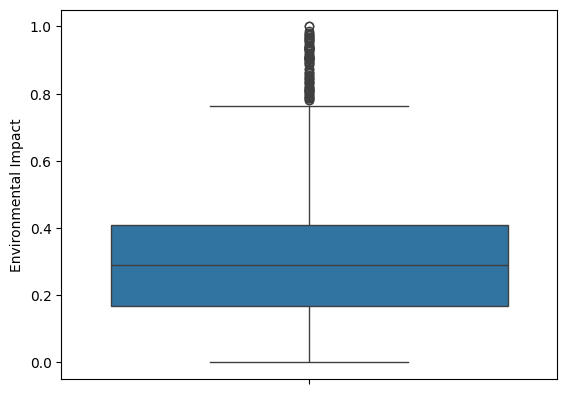

In [49]:
sns.boxplot(df['Environmental Impact'])

In [57]:
q1 = df['Environmental Impact'].quantile(0.25)
q3 = df['Environmental Impact'].quantile(0.75)

In [58]:
iqr = q3-q1

In [59]:
q1,q3,iqr

(0.16834203554967953, 0.4080803485398712, 0.23973831299019166)

In [60]:
upper_limit=  q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-0.19126543393560796, 0.7676878180251587)

In [61]:
df.loc[(df['Environmental Impact'] > upper_limit) | (df['Environmental Impact'] < lower_limit)]

Date        Road/Intersection Name  Traffic Volume  \
46     2022-01-01          14th B Road, Khar(W)        0.119313   
1651   2022-01-06               G R jolly marg         0.470688   
1894   2022-01-07  Jiva Mahale Marg Side strip         0.180487   
2496   2022-01-09               MIDC Road no 14        0.124301   
6479   2022-01-23                Cyril Rd Exten        0.110162   
...           ...                           ...             ...   
102858 2022-12-21            AmarMahal Chembur         0.276746   
103023 2022-12-22      Road No 5, Rizvi complex        0.210183   
104045 2022-12-25                    pipe line         0.123084   
104101 2022-12-25              Ambedkar Garden         0.077596   
105127 2022-12-29         Sahar Road Side Strip        0.170033   

        Average Speed  Travel Time Index  Congestion Level  \
46           0.000000           0.497143          0.740000   
1651         0.000000           0.523776          0.830000   
1894         0.000000           0.361020          0.410000   
2496         0.117172           0.284082          0.490000   
6479         0.000000           0.674694          0.940000   
...               ...                ...               ...   
102858       0.117172           0.254490          0.430000   
103023       0.000000           0.544490          0.520000   
104045       0.000000           0.689353          0.964769   
104101       0.000000           0.501215          0.937071   
105127       0.000000           0.864082          0.641741   

        Road Capacity Utilization  Incident Reports  Environmental Impact  \
46                       0.035228               0.2              0.920947   
1651                     0.188560               0.6              0.785305   
1894                     0.482186               0.4              0.939030   
2496                     0.590485               0.4              0.846163   
6479                     0.526734               0.4              0.909685   
...                           ...               ...                   ...   
102858                   0.543783               0.0              0.926643   
103023                   0.453222               1.0              0.985189   
104045                   0.939082               0.4              0.843223   
104101                   0.114394               0.4              0.973159   
105127                   0.566703               0.8              0.816720   

        Public Transport Usage  Traffic Signal Compliance  Parking Usage  \
46                    0.843269                   0.662028       0.473494   
1651                  0.958511                   0.502944       0.070788   
1894                  0.521446                   0.842303       0.600231   
2496                  0.588133                   0.000000       0.191477   
6479                  0.827355                   0.467844       0.188524   
...                        ...                        ...            ...   
102858                0.865733                   0.298805       0.429535   
103023                0.784730                   0.071459       0.134558   
104045                0.146244                   0.291579       0.929645   
104101                0.596151                   0.711182       0.315256   
105127                0.458685                   0.558862       0.399649   

        Pedestrian and Cyclist Count Weather Conditions  \
46                          0.462025               Mild   
1651                        0.398734               Mild   
1894                        0.291139               Mild   
2496                        0.234177               Mild   
6479                        0.822785               Mild   
...                              ...                ...   
102858                      0.753165                Fog   
103023                      0.626582                Fog   
104045                      0.436709               Mild   
104101                      0.17721

In [64]:
new_df = df.loc[(df['Environmental Impact'] < upper_limit) & (df['Environmental Impact'] > lower_limit)]
print('before removing outliers: ' , len(df))
print('after removing outliers: ', len(new_df))
print('outliers:' ,len(df) - len(new_df))

before removing outliers:  105850
after removing outliers:  105761
outliers: 89


C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Environmental Impact'>

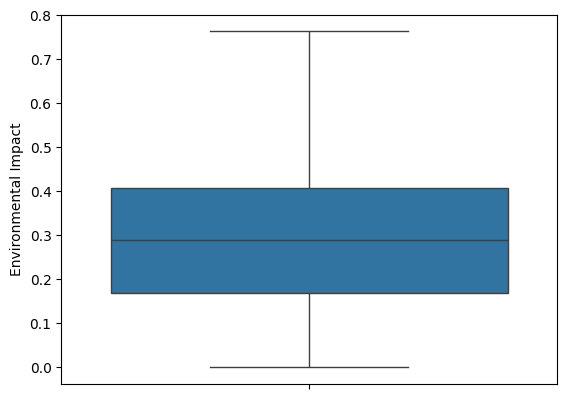

In [65]:
sns.boxplot(new_df['Environmental Impact'])

# Feature Engineering